<a href="https://colab.research.google.com/github/Amal-Baby-Mathews/Mega_ML/blob/main/ML_4textclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf
from tensorflow import keras
# pip install numpy=1.16.1
import numpy as numpy
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


In [64]:
data = keras.datasets.reuters #using keras's reuters dataset to classify news articles
(x_train, y_train), (x_test, y_test) = data.load_data(num_words=80, test_split=0.2)
#preprocessing the data
tokenizer = Tokenizer(num_words=80)

x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')  # Vectorize word sequences
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
y_train = keras.utils.to_categorical(y_train, num_classes=46)  # One-hot encode labels
y_test = keras.utils.to_categorical(y_test, num_classes=46)

In [65]:
# model=keras.Sequential(
#     [
#         keras.layers.Embedding(10000, 64),# Embedding layer is used to convert words into vector
#         keras.layers.GlobalAveragePooling1D(), # Global average pooling layer is used to reduce the dimensionality of the data
#         keras.layers.Dense(64, activation="relu"),
#         keras.layers.Dense(46, activation="sigmoid"),

#             ]
# )
model = Sequential([
    Dense(64, activation='relu', input_shape=(80,)),  # Input layer matching vocabulary size
    Dense(64, activation='relu'),  # Hidden layer
    Dense(46, activation='softmax')  # Output layer for 46 topics
])

In [66]:
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                5184      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 46)                2990      
                                                                 
Total params: 12334 (48.18 KB)
Trainable params: 12334 (48.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}
prop=history
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
class CustomHistory(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # history.update({k: v for k, v in zip(logs.keys(), logs.values())})
        for key, value in logs.items():
          if key in history:
              history[key].append(value)  # Append if key exists
          else:
              history[key] = [value]  # Create a new list for the key

In [68]:


model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test),
          callbacks=[early_stopping, CustomHistory()],
          verbose=1,  # Display progress bar
          shuffle=True)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/100
281/281 [==============================] - 2s 4ms/step - loss: 1.9925 - accuracy: 0.4991 - val_loss: 1.6629 - val_accuracy: 0.5962
Epoch 2/100
281/281 [==============================] - 1s 4ms/step - loss: 1.5016 - accuracy: 0.6362 - val_loss: 1.4903 - val_accuracy: 0.6336
Epoch 3/100
281/281 [==============================] - 1s 4ms/step - loss: 1.3708 - accuracy: 0.6622 - val_loss: 1.4333 - val_accuracy: 0.6402
Epoch 4/100
281/281 [==============================] - 1s 4ms/step - loss: 1.3010 - accuracy: 0.6745 - val_loss: 1.3869 - val_accuracy: 0.6518
Epoch 5/100
281/281 [==============================] - 1s 4ms/step - loss: 1.2518 - accuracy: 0.6837 - val_loss: 1.3813 - val_accuracy: 0.6536
Epoch 6/100
281/281 [==============================] - 1s 4ms/step - loss: 1.2161 - accuracy: 0.6883 - val_loss: 1.3551 - val_accuracy: 0.6549
Epoch 7/100
281/281 [==============================] - 1s 4ms/step - loss: 1.1811 - accuracy: 0.6946 - val_loss: 1.3412 - val_accuracy: 0.6616

In [69]:
import matplotlib.pyplot as plt

In [70]:
print(history)

{'loss': [1.9924958944320679, 1.5015604496002197, 1.3708363771438599, 1.3010265827178955, 1.2517552375793457, 1.2160958051681519, 1.1811423301696777, 1.152669906616211, 1.1269880533218384, 1.1019624471664429, 1.083981990814209, 1.0610151290893555, 1.0426216125488281, 1.0212093591690063, 1.0062059164047241, 0.9847065806388855, 0.969197154045105], 'accuracy': [0.49910932779312134, 0.636161208152771, 0.6622133255004883, 0.6744600534439087, 0.6837007403373718, 0.6882654428482056, 0.6946114301681519, 0.7021821141242981, 0.7083054780960083, 0.7106435298919678, 0.7163215279579163, 0.7225562334060669, 0.7241148948669434, 0.7253395915031433, 0.7314629554748535, 0.7373636364936829, 0.7414829730987549], 'val_loss': [1.6628870964050293, 1.4903311729431152, 1.4332866668701172, 1.3868998289108276, 1.381282925605774, 1.3550721406936646, 1.3411592245101929, 1.3368695974349976, 1.3355817794799805, 1.3286515474319458, 1.3087965250015259, 1.334764838218689, 1.324283242225647, 1.319653868675232, 1.3214095

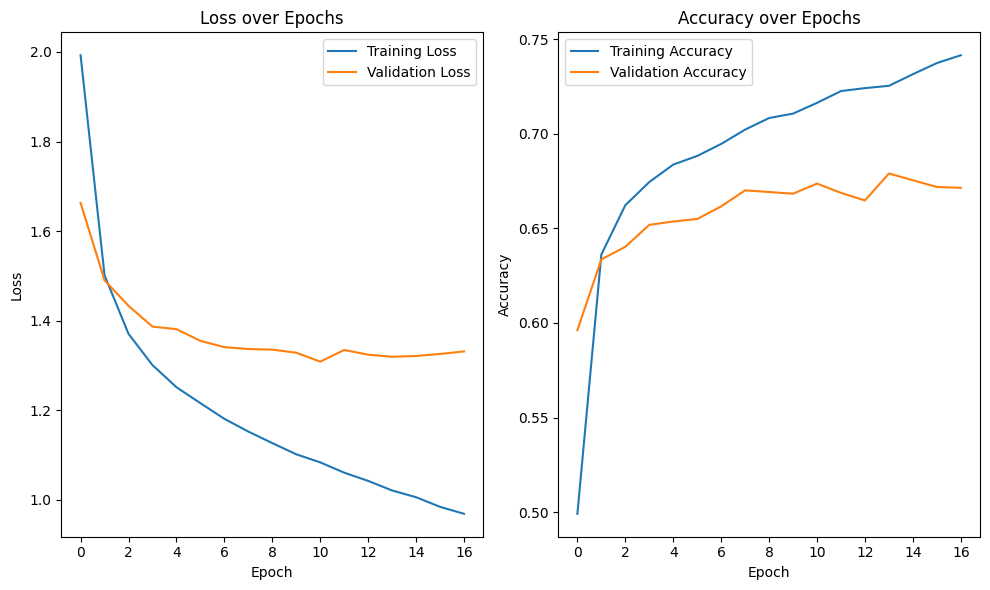

In [71]:

train_loss = history['loss']
train_accuracy = history['accuracy']
val_loss = history['val_loss']
val_accuracy = history['val_accuracy']

# Create two subplots for loss and accuracy
plt.figure(figsize=(10, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.tight_layout()
plt.show()

In [72]:
# Load the word index only once
word_index = keras.datasets.reuters.get_word_index()

# Create the tokenizer with appropriate vocabulary size
tokenizer = Tokenizer(num_words=len(word_index) + 1)  # Include OOV token
tokenizer.word_index = word_index

# Preprocess your text article
text_article = "This is your text article to be classified."
sequences = tokenizer.texts_to_sequences([text_article])
padded_sequences = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)

# Make the prediction
prediction = model.predict(padded_sequences)
predicted_topic_index = prediction.argmax(axis=1)[0]  # Get the index of the most probable topic

# Map the index back to the topic label (no need to reload word_index)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequences[0]])
predicted_topic_label = reverse_word_index.get(predicted_topic_index + 3, '?')  # Add 3 to offset for reserved indices

print("Predicted topic:", predicted_topic_label)
print("Decoded newswire (for reference):", decoded_newswire)  # Optional


1/1 [==============================] - 0s 53ms/step
Predicted topic: and
Decoded newswire (for reference): company pct strict committee's politically ? by deregulate
